#Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading data to dataframe
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_ML/Lending Club Case Study/loan/loan.csv')

#Verifying the data loaded
df.head()

<ipython-input-2-73e9d4a49dea>:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_ML/Lending Club Case Study/loan/loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#Data Cleaning

## Fixing Columns


In [3]:
# checking the data in columns
df.count()
# By using the above we found that there are few columns which do not have value
# checking the count of those columns
df1 = df.count()!=0
df1.value_counts()
# By using the above we find that we have 57 columns which contains data and 54 columns which do not contain data


,count
True,57
False,54


In [4]:
# Deleting the columns from data frame
df.drop(df.columns[df.count()==0],axis=1,inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [5]:
# Now verifying the zero column records again
df1 = df.count()!=0
df1.value_counts()
# by using the above we confirm that we dont have any null valued columns in the data frame


,count
True,57


In [6]:
# Finding the null values in the columns
null_values = df.isnull().sum()>0
df.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0


In [7]:
# droping the column which contains null values
df.drop(df.columns[df.isnull().sum()>1000],axis=1,inplace=True)
df.shape

(39717, 51)

In [8]:
# int_ rate column is in string datatype so has to be converted to float
df['int_rate'] = df['int_rate'].str.replace('%','').astype(float)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
# renaming term which is in string to integer value and also renaming the column name to term_in_months
df['term'] = df['term'].str.replace('months','').astype(int)
df.rename(columns={'term':'term_in_months'},inplace=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
#checking how many unique values are there in each column
df.nunique().sort_values()

,0
tax_liens,1
delinq_amnt,1
chargeoff_within_12_mths,1
acc_now_delinq,1
application_type,1
policy_code,1
collections_12_mths_ex_med,1
pymnt_plan,1
initial_list_status,1
term_in_months,2


In [11]:
#From the above information it is evident that columns which have unique values as
# 1 will not give any usefull information hence can be dropped from the data frame.
df.drop(df.columns[df.nunique()==1],axis=1,inplace=True)
df.head()
df.shape

(39717, 42)

In [12]:
# verifying the datatype of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term_in_months           39717 non-null  int64  
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [13]:
# from the above information it is clear that we still have some null values in the data set
# lets check the null values in each columns and fix that
null_values = df.isnull().sum()
null_values[null_values>0]


,0
title,11
revol_util,50
last_pymnt_d,71
last_credit_pull_d,2
pub_rec_bankruptcies,697


In [14]:
#By seeing the above values it can be inferred that we need to do some data cleaning for the above values


In [15]:
# lets analyse what is the data if we can mock the data inspite  of droping the columns
# printing the column where the title is null
df[df['title'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
25188,588911,756574,8000,8000,8000.000000,36,19.79,296.46,F,F5,...,9758.88,8000.00,1758.88,0.0,0.0,0.00,Feb-12,5314.13,May-16,0.0
27477,552630,708107,20000,20000,19852.540000,60,16.32,489.77,D,D5,...,29152.20,20000.00,9386.04,0.0,0.0,0.00,Aug-15,509.53,May-16,0.0
28469,534867,691222,13750,13750,13750.000000,60,16.32,336.72,D,D5,...,20202.80,13750.00,6452.80,0.0,0.0,0.00,Jul-15,352.03,Jul-15,0.0
28700,533057,689005,10000,10000,10000.000000,60,11.49,219.88,B,B4,...,3231.08,1704.13,1144.95,0.0,382.0,3.88,Aug-11,219.88,Jan-12,0.0
28710,533761,689914,1800,1800,1800.000000,36,14.84,62.26,D,D1,...,2241.39,1800.00,441.39,0.0,0.0,0.00,Jul-13,68.26,Jul-13,0.0
28716,533665,689802,6000,6000,5950.000000,36,11.49,197.83,B,B4,...,7062.55,6000.00,1121.90,0.0,0.0,0.00,Jul-13,216.31,Jul-13,0.0
28985,529210,641328,24000,15200,9200.020000,60,17.19,379.32,E,E3,...,2019.50,1179.69,1472.96,0.0,0.0,0.00,Jan-11,379.32,May-16,0.0
29008,528842,683949,1300,1300,1250.000000,36,13.61,44.19,C,C2,...,1519.86,1300.00,280.65,0.0,0.0,0.00,Dec-12,305.50,May-16,0.0
30307,510485,659169,5600,5600,5600.000000,36,11.36,184.31,B,B5,...,6635.27,5600.00,1035.27,0.0,0.0,0.00,May-13,191.94,May-16,0.0
31575,493558,631512,8000,8000,7000.000000,36,7.14,247.52,A,A3,...,7122.10,8000.00,139.50,0.0,0.0,0.00,Jul-10,2.51,Jul-10,0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term_in_months           39717 non-null  int64  
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [17]:
# the columns which are generated after the loan approval will not be of any use for this analysis hence can be dropped
df.drop(['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc','open_acc', 'pub_rec','revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],axis=1,inplace=True)
df.shape

(39717, 22)

In [18]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [19]:
df['term_in_months'].unique()

array([36, 60])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term_in_months        39717 non-null  int64  
 6   int_rate              39717 non-null  float64
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  url                

In [21]:
df['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [22]:
#replace the value of nan to 0 in pub_rec_bancruptices columns
df['pub_rec_bankruptcies'].fillna(0,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   member_id             39717 non-null  int64  
 2   loan_amnt             39717 non-null  int64  
 3   funded_amnt           39717 non-null  int64  
 4   funded_amnt_inv       39717 non-null  float64
 5   term_in_months        39717 non-null  int64  
 6   int_rate              39717 non-null  float64
 7   installment           39717 non-null  float64
 8   grade                 39717 non-null  object 
 9   sub_grade             39717 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  url                

In [24]:
print(df.head(1))

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0  1077501    1296599       5000         5000           4975.0   

   term_in_months  int_rate  installment grade sub_grade  ...  \
0              36     10.65       162.87     B        B2  ...   

  verification_status  issue_d loan_status  \
0            Verified   Dec-11  Fully Paid   

                                                 url      purpose     title  \
0  https://lendingclub.com/browse/loanDetail.acti...  credit_card  Computer   

  zip_code addr_state    dti pub_rec_bankruptcies  
0    860xx         AZ  27.65                  0.0  

[1 rows x 22 columns]


In [25]:
# Converting Data type of issue_d to date
df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y')

In [26]:
df.dtypes

,0
id,int64
member_id,int64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
term_in_months,int64
int_rate,float64
installment,float64
grade,object
sub_grade,object


In [27]:
# Confirming on the null values if any exists
df.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term_in_months,0
int_rate,0
installment,0
grade,0
sub_grade,0


# Derived Columns

## deriving the issue year and issue month columns from the dataset  

In [28]:
# generating year and month column from issue_d column
df['issue_year']=df['issue_d'].dt.year

df['issue_month']=df['issue_d'].dt.month

# Univariate Analysis

## Quantitative Variables

<ipython-input-29-178a19a5f30f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'])
<ipython-input-29-178a19a5f30f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['funded_amnt'])
<ipython-input-29-178a19a5f30f>:8: UserWarning: 

`distplot` is a deprecated function and will be 

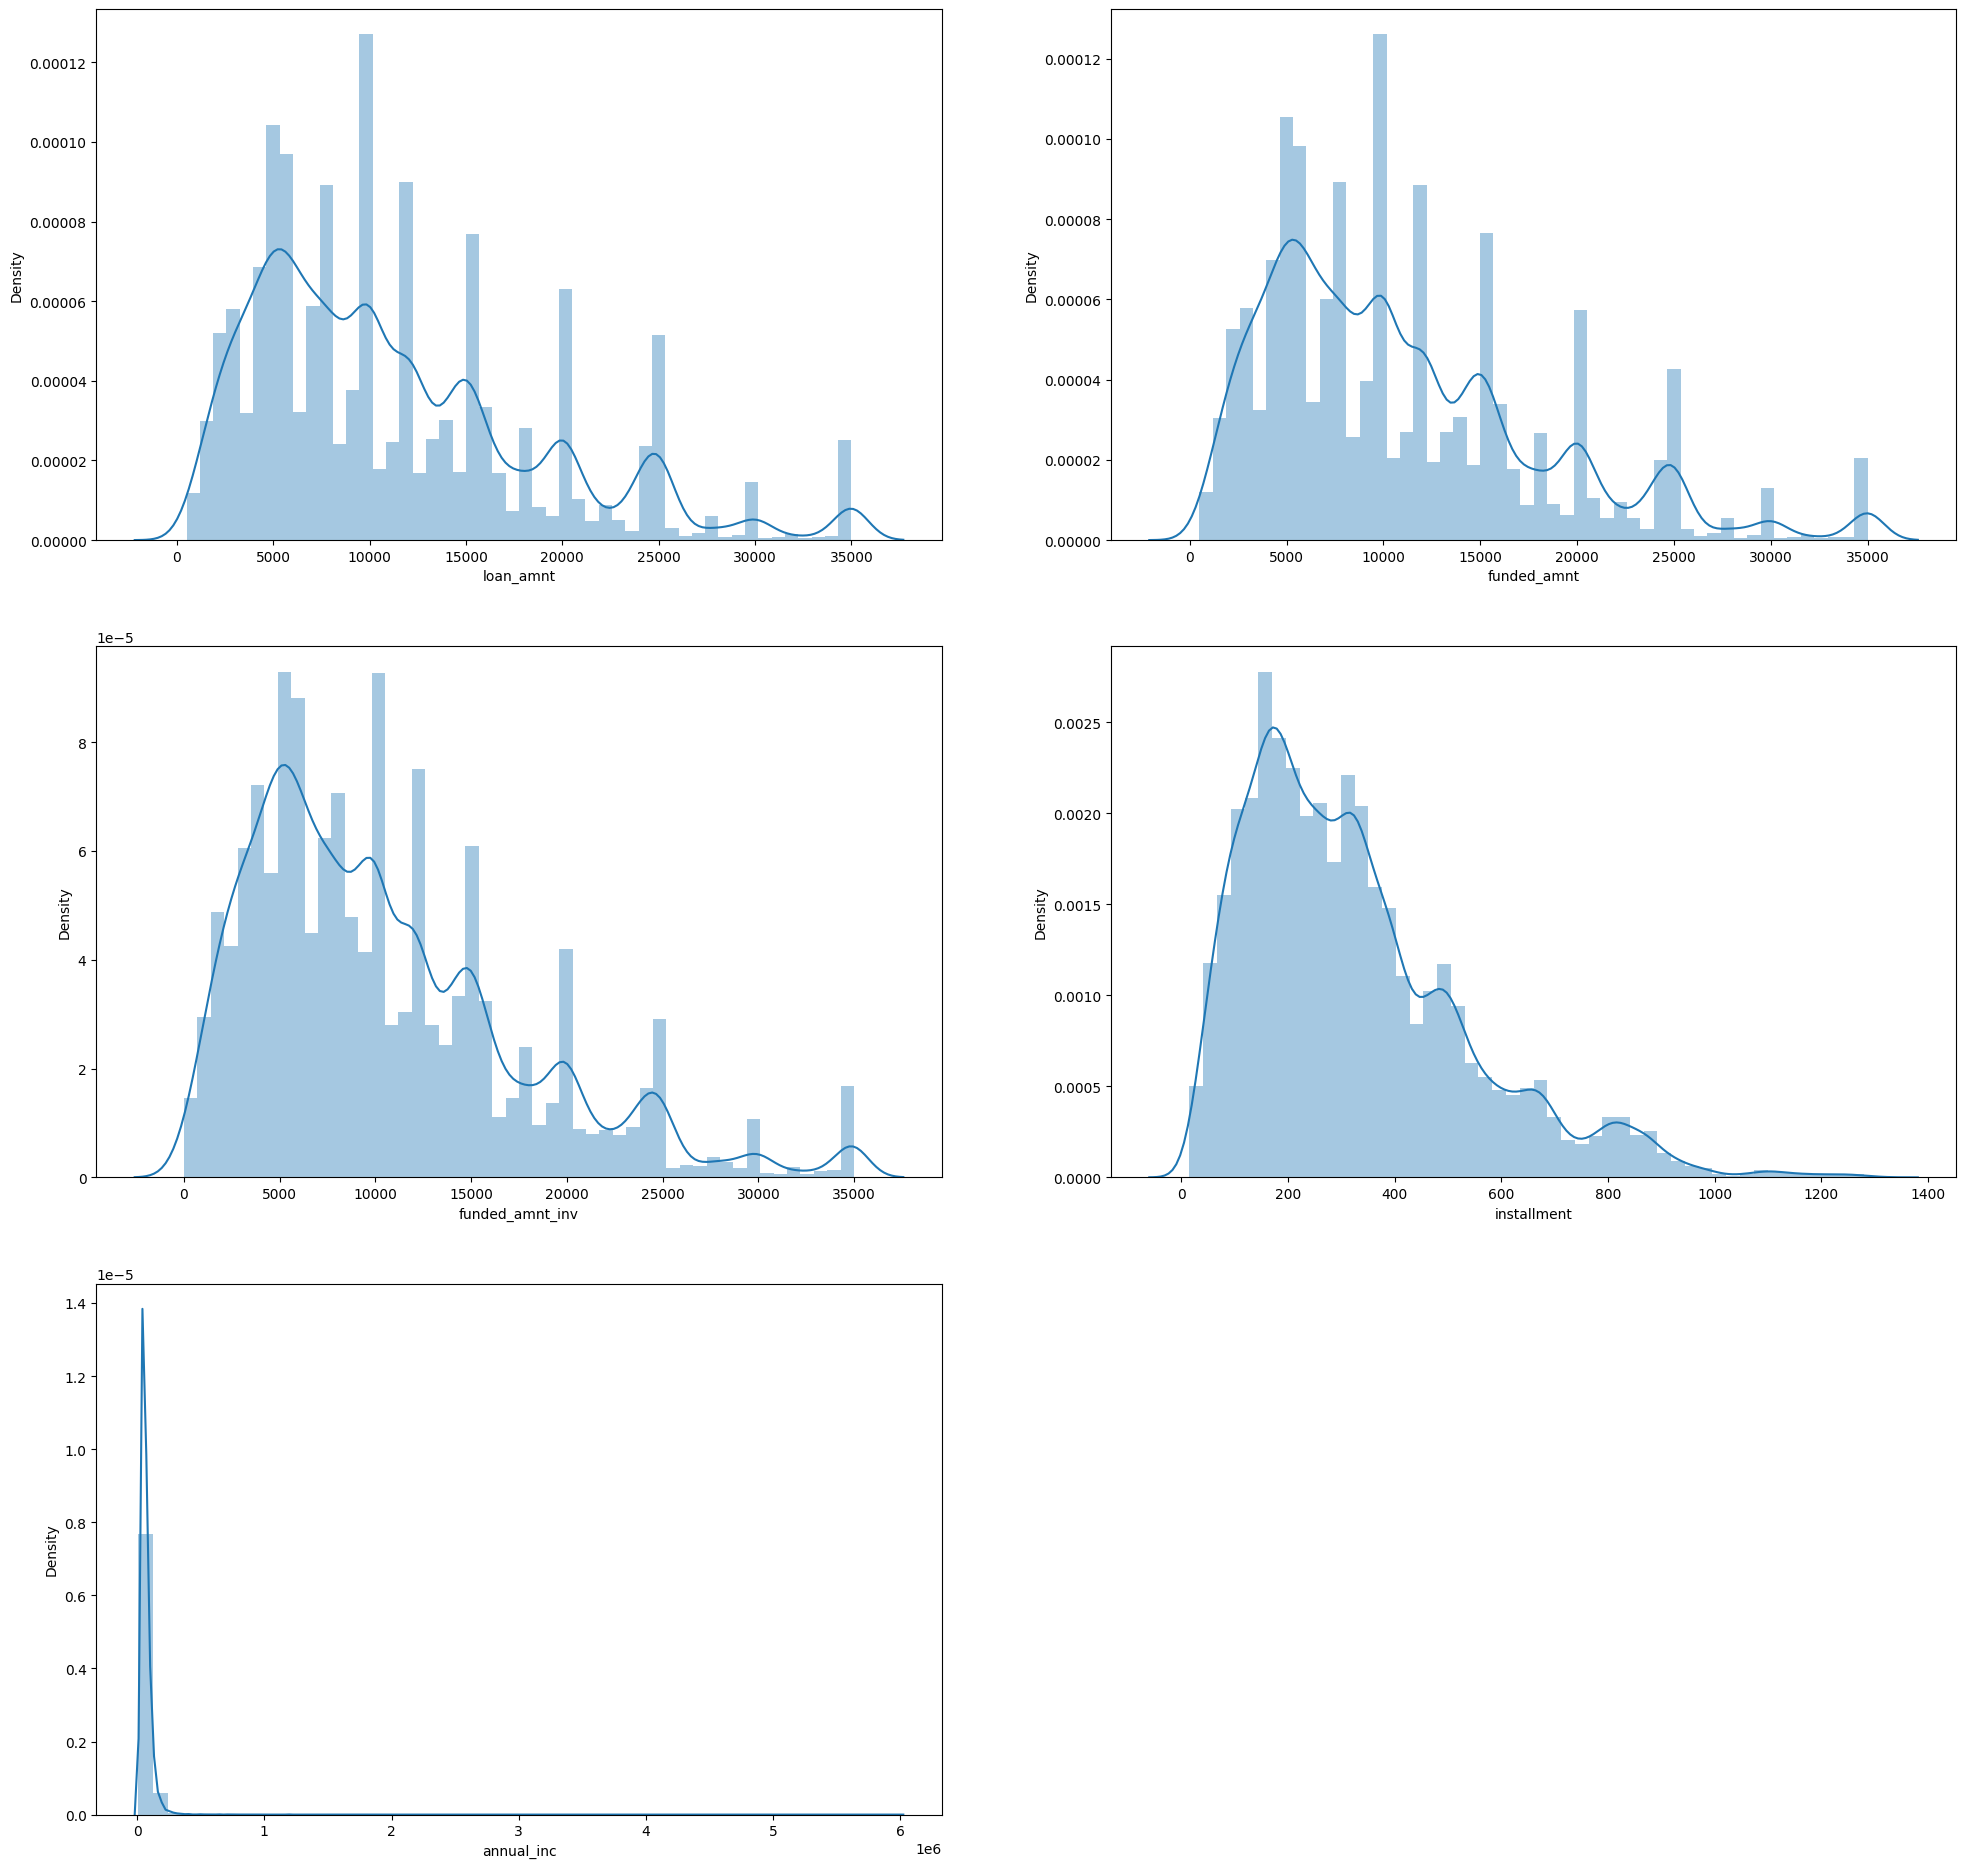

In [29]:
# Creating plots
plt.figure(figsize=(24,40))
plt.subplot(5,2,1)
sns.distplot(df['loan_amnt'])
plt.subplot(5,2,2)
sns.distplot(df['funded_amnt'])
plt.subplot(5,2,3)
sns.distplot(df['funded_amnt_inv'])
plt.subplot(5,2,4)
sns.distplot(df['installment'])
plt.subplot(5,2,5)
sns.distplot(df['annual_inc'])
plt.show()

In [30]:
# the above plots we can say that income clearly has outliers
# Hence need to treat outliers

## Outliers Treatment

<Axes: ylabel='annual_inc'>

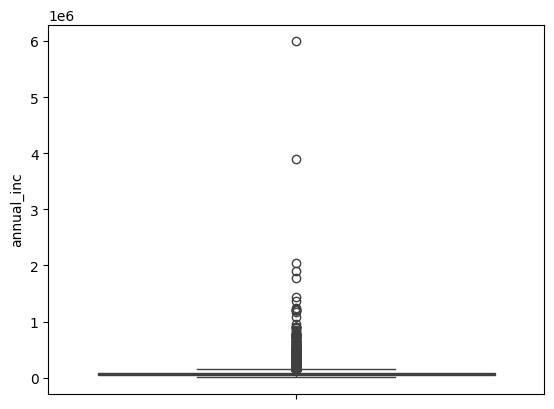

In [31]:
#analyse outliers in annual_inc using boxplot
sns.boxplot(df['annual_inc'])

In [32]:
# By the box plot it is evident that we should remove the outliers from analysis
# we can get more information on the annual income
df.annual_inc.describe()

,annual_inc
count,3.971700e+04
mean,6.896893e+04
std,6.379377e+04
min,4.000000e+03
25%,4.040400e+04
50%,5.900000e+04
75%,8.230000e+04
max,6.000000e+06


In [33]:
# Numerical summary
print('90% Data', df['annual_inc'].quantile(0.9))
print('99% Data:', df['annual_inc'].quantile(0.99))
print('100% Data:', df['annual_inc'].quantile(1))

90% Data 116000.0
99% Data: 234999.36
100% Data: 6000000.0


In [34]:
# we will remove the outliers of 90 percent to check test the accuracy of the plot
df = df [df.annual_inc <= df['annual_inc'].quantile(0.9)]

<Axes: ylabel='annual_inc'>

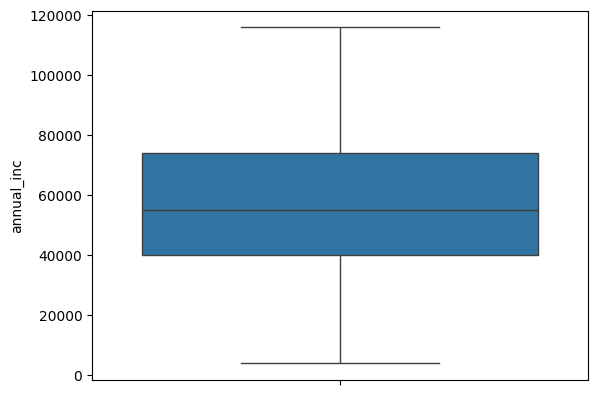

In [35]:
# Now verifying the box plot for annual_inc
sns.boxplot(df['annual_inc'])

<ipython-input-36-ac3a0db643f1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'])
<ipython-input-36-ac3a0db643f1>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['funded_amnt'])
<ipython-input-36-ac3a0db643f1>:9: UserWarning: 

`distplot` is a deprecated function and will be 

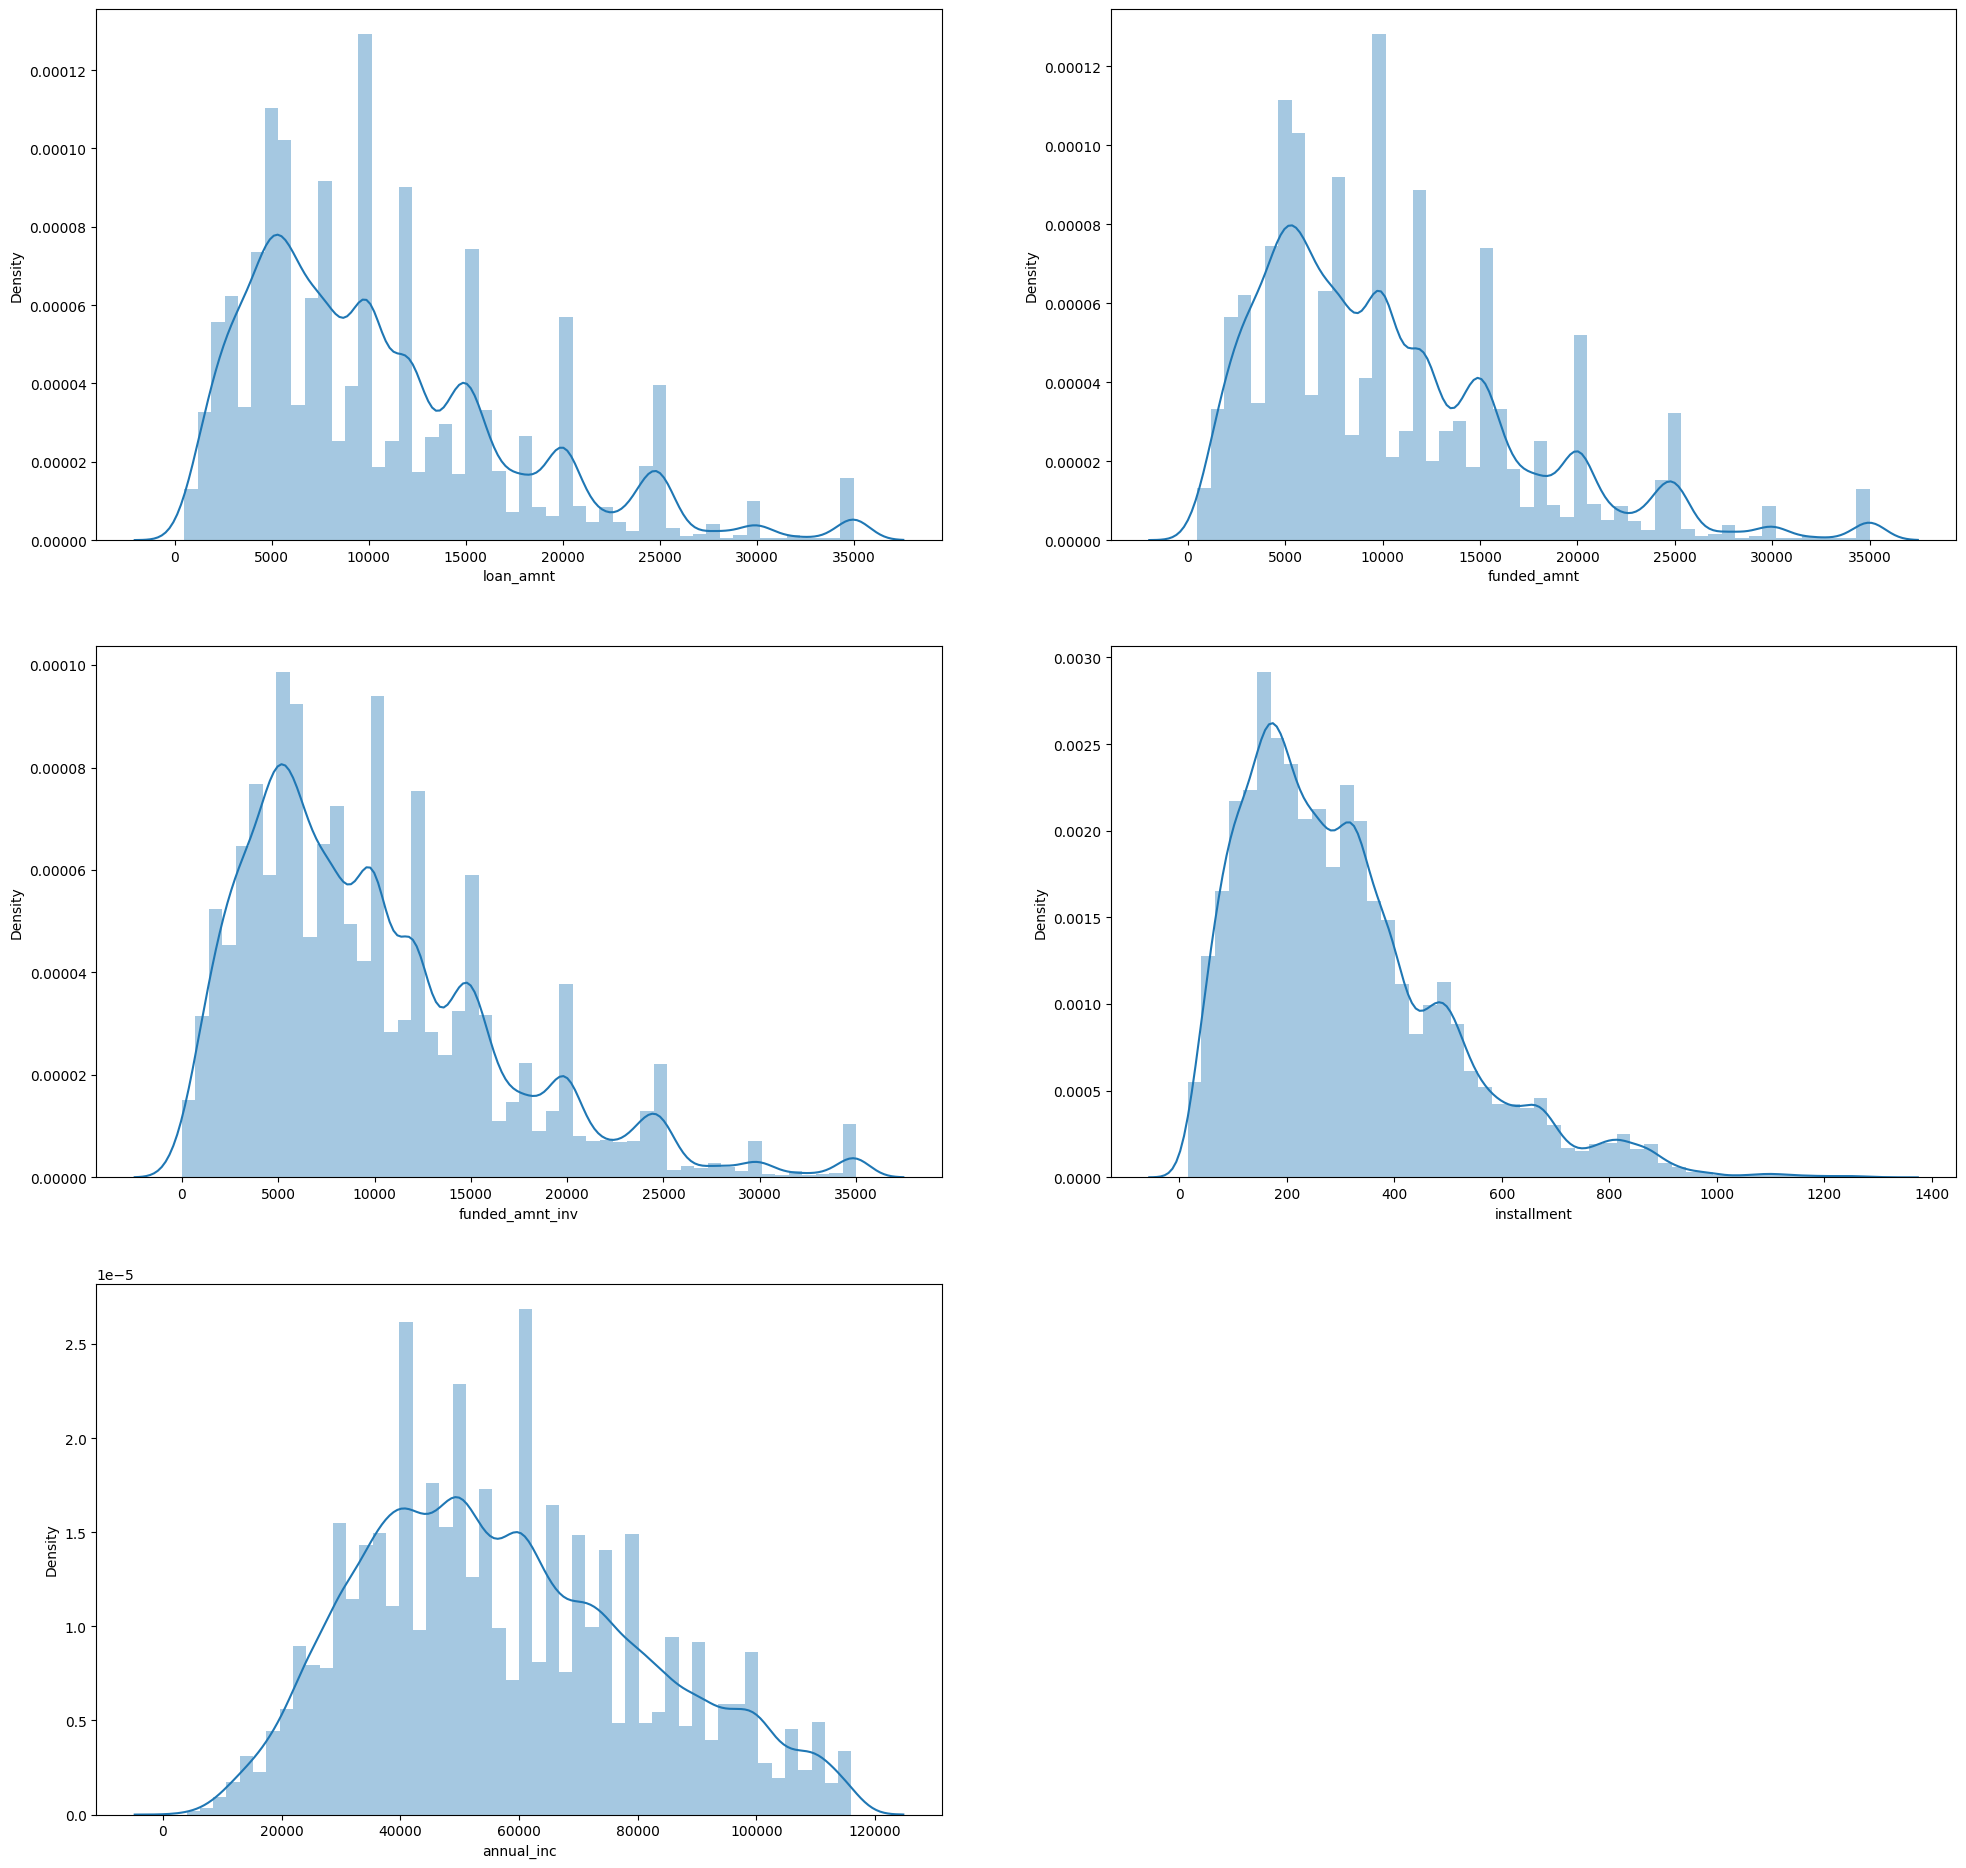

In [36]:
# again verifying the plots
# Creating plots
plt.figure(figsize=(24,40))
plt.subplot(5,2,1)
sns.distplot(df['loan_amnt'])
plt.subplot(5,2,2)
sns.distplot(df['funded_amnt'])
plt.subplot(5,2,3)
sns.distplot(df['funded_amnt_inv'])
plt.subplot(5,2,4)
sns.distplot(df['installment'])
plt.subplot(5,2,5)
sns.distplot(df['annual_inc'])
plt.show()



*   Density distribution for all the three features are similar. Hence, we can proceed forward to anlayse with any of the feature.
*  * Based on the nature by description we will proceed forward with "loan_amnt".



### Analyzing interest rate


<ipython-input-37-2a9699567320>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df.int_rate, rug=True)


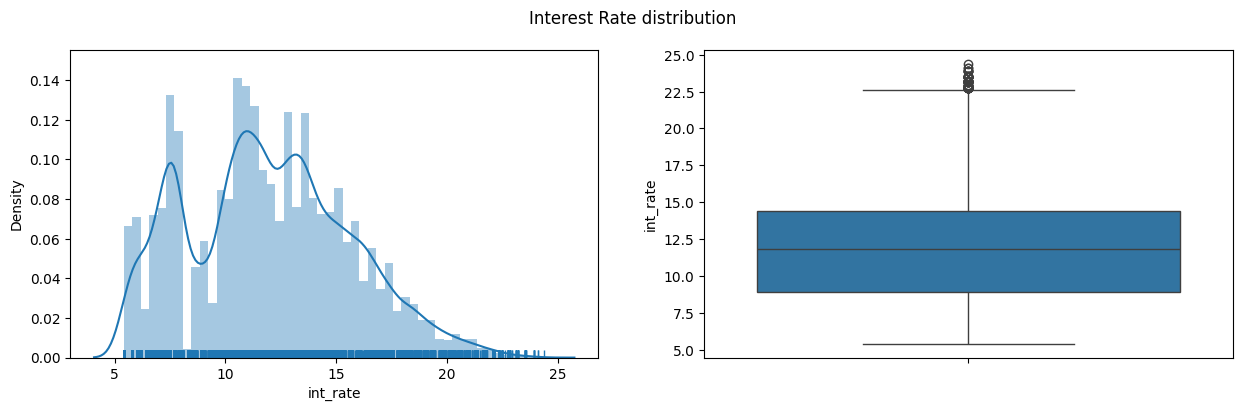

In [37]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(a=df.int_rate, rug=True)

#Setting subplot index
plt.subplot(1,2,2)

#Box plot
sns.boxplot(data=df.int_rate)

#Single title for both subplots.
plt.suptitle('Interest Rate distribution')
plt.show()

In [38]:
df.int_rate.describe()

,int_rate
count,35771.000000
mean,11.945522
std,3.674997
min,5.420000
25%,8.940000
50%,11.830000
75%,14.420000
max,24.400000


### Analyzing Loan Amount

<ipython-input-39-9fcd8d29b107>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df.loan_amnt, rug=True)


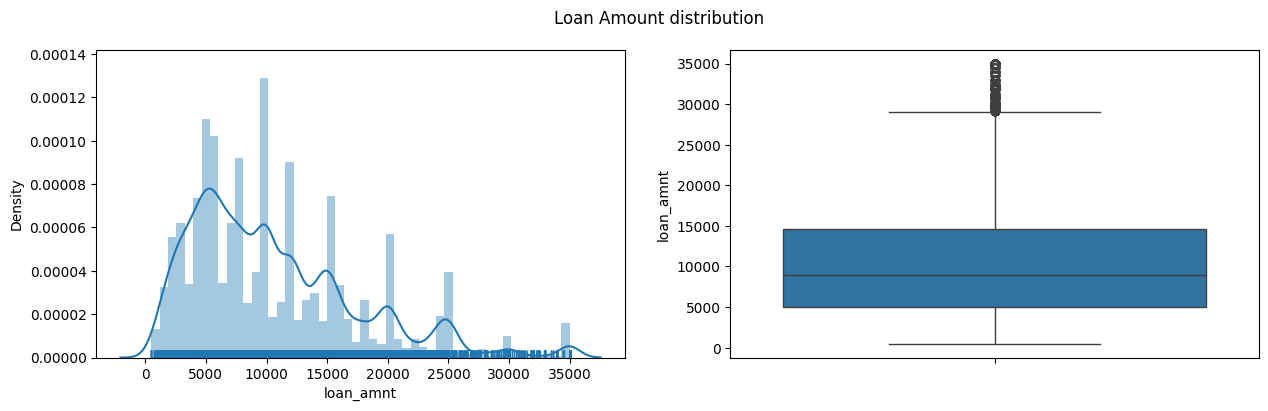

In [39]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(a=df.loan_amnt, rug=True)

#Setting subplot index
plt.subplot(1,2,2)

#Box plot
sns.boxplot(data=df.loan_amnt)

#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

### Analyzing Annual income

<ipython-input-40-c42fbb6022ee>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df.annual_inc, rug=True)


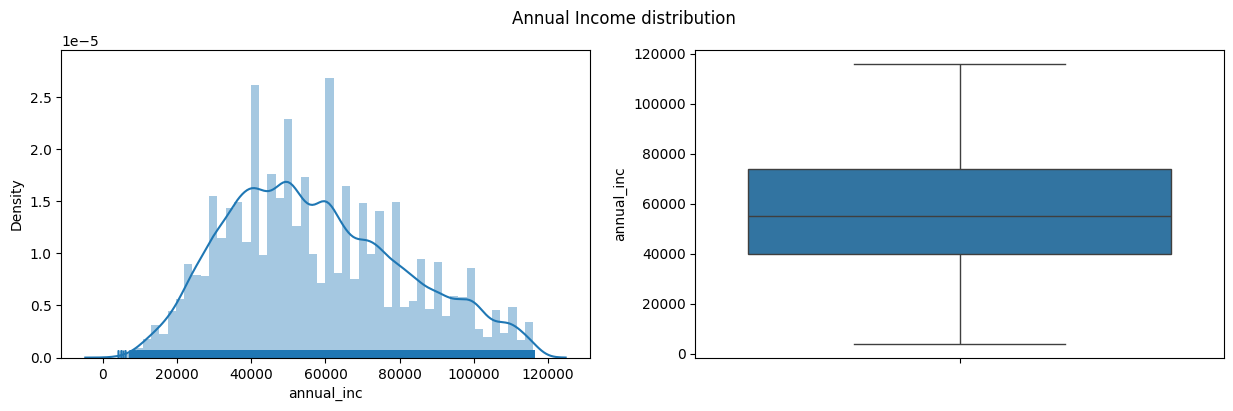

In [40]:
#Setting up the figure size of the plot
plt.figure(figsize=(15,4))

#Setting subplot index
plt.subplot(1,2,1)

#Distribution plot
sns.distplot(a=df.annual_inc, rug=True)

#Setting subplot index
plt.subplot(1,2,2)

#Box plot
sns.boxplot(data=df.annual_inc)

#Single title for both subplots.
plt.suptitle('Annual Income distribution')
plt.show()

### Loan issue month analysis

Text(0.5, 1.0, 'Loan Issue Month')

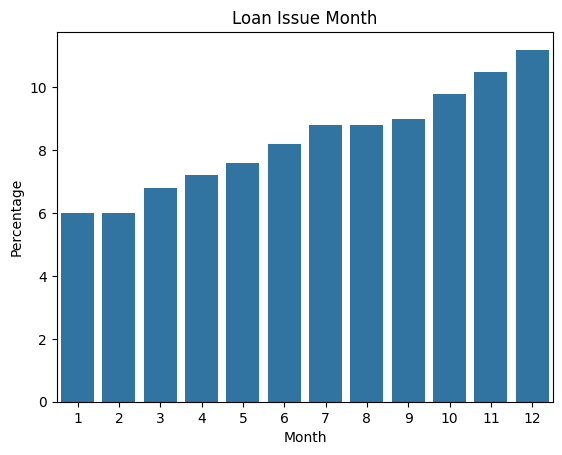

In [41]:
# Count plot for issue month
df['issue_month'].value_counts(normalize=True).mul(100).round(1)
data = df['issue_month'].value_counts(normalize=True).mul(100).round(1)
sns.barplot(data=data)
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Loan Issue Month')

Text(0.5, 1.0, 'Loan Issue Year')

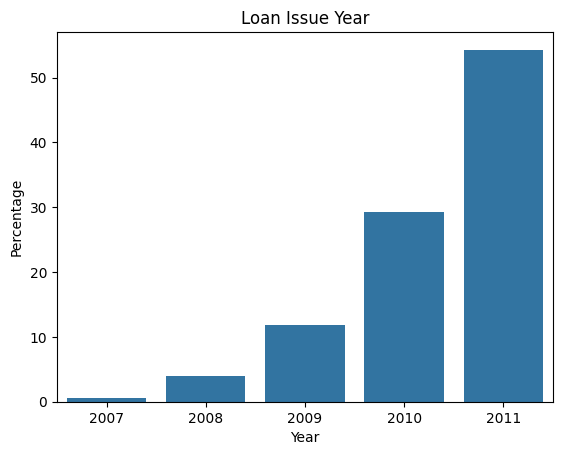

In [44]:
data = df['issue_year'].value_counts(normalize=True).mul(100).round(1)
sns.barplot(data=data)
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Loan Issue Year')

# Unordered Categorical Variables

## Analyzing loan status

Text(0.5, 1.0, 'Loan Status Plot')

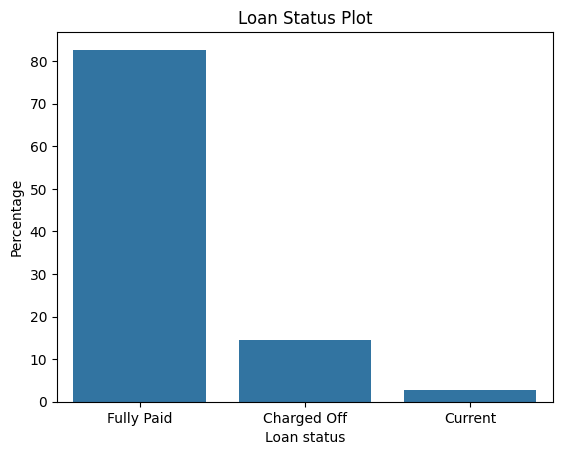

In [47]:
#converting value_count into percentage
data = df['loan_status'].value_counts(normalize=True).mul(100).round(1)
sns.barplot(data=data)
plt.xlabel('Loan status')
plt.ylabel('Percentage')
plt.title('Loan Status Plot')